# Common Distributions

### Normal

Shape: Bell Curve
Example: IQ Scores

### Positive Skewed

Shape: Asymmetrical, Long Tail +
Example: Income

### Negative Skewed

Shape: Asymmetrical, Long Tail -
Example: Tests Scores where many people got high scores and a few very low

### Uniform

Shape: Generally level
Example: Rolling a dice 100 times

### Bimodal

Shape: Two peaks
Example: Male and Female heights
Often used to show two mixed groups together

### Poisson

Shape: like dorsal fins 
Example: Counting 
Often discrete intergers like 0, 1, 2, 3

### Discrete

Shape: Random
Example: product rating
Values are spaced and repeatable

# Concept Reinforcements

### Skewness
    - Indicates asymmetry. High skew = imbalance in how values are spread

### Kurtosis
    - Measures tail "heaviness". High kurtosis = more outliers

### Range
    - Quick sense of spread. But is sentisive to outliers

### Mean / Median / Mode
    - Central tendency - watch for agreement or divergence among them.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis, norm

# Set seed for reproducibility 
np.random.seed(42)

# Generate distributions
size = 1000
df = pd.DataFrame({
    "Normal": np.random.normal(loc=0, scale=2, size=size),
    "Positive Skewed": np.random.exponential(scale=1.5, size=size),
    "Negative Skewed": -np.random.exponential(scale=1.5, size=size),
    "Uniform": np.random.uniform(low=-2, high=2, size=size),
    "Bimodal": np.concatenate(
        [np.random.normal(loc=-2, scale=0.5, size=size//2),
        np.random.normal(loc=2, scale=0.5, size=size//2)]
        ),
    "Poisson": np.random.poisson(lam=3.0, size=size),
    "Discrete": np.random.choice(
        [10, 12, 14, 15, 16, 17, 20], size=size
        ),
})

# Round to 3 decimal places for display
df = df.round(3)

# Collect summary stats
summary = pd.DataFrame({
    "Mean": df.mean(),
    "Median": df.median(),
    "Mode": df.mode().iloc[0],
    "Std Dev": df.std(),
    "Variance": df.var(),
    "Skewness": df.skew(),
    "Kurtosis": df.kurtosis(),
    "Min": df.min(),
    "Max": df.max(),
    "Range": df.max() - df.min(),
})

# Display summary table 
summary.style.background_gradient(cmap="Blues").format(precision=2)

,Mean,Median,Mode,Std Dev,Variance,Skewness,Kurtosis,Min,Max,Range
Normal,0.04,0.05,-1.15,1.96,3.84,0.12,0.07,-6.48,7.71,14.19
Positive Skewed,1.51,1.09,0.06,1.50,2.26,1.98,5.41,0.01,11.16,11.16
Negative Skewed,-1.46,-1.01,-0.23,1.42,2.01,-1.64,3.03,-9.19,-0.00,9.19
Uniform,-0.03,-0.04,0.65,1.14,1.31,0.01,-1.18,-2.00,2.00,4.00
Bimodal,-0.02,0.06,-2.69,2.05,4.22,0.00,-1.77,-3.46,3.58,7.04
Poisson,2.95,3.00,3.00,1.57,2.46,0.44,0.19,0.00,9.00,9.00
Discrete,14.83,15.00,12.00,3.01,9.07,0.07,-0.74,10.00,20.00,10.00


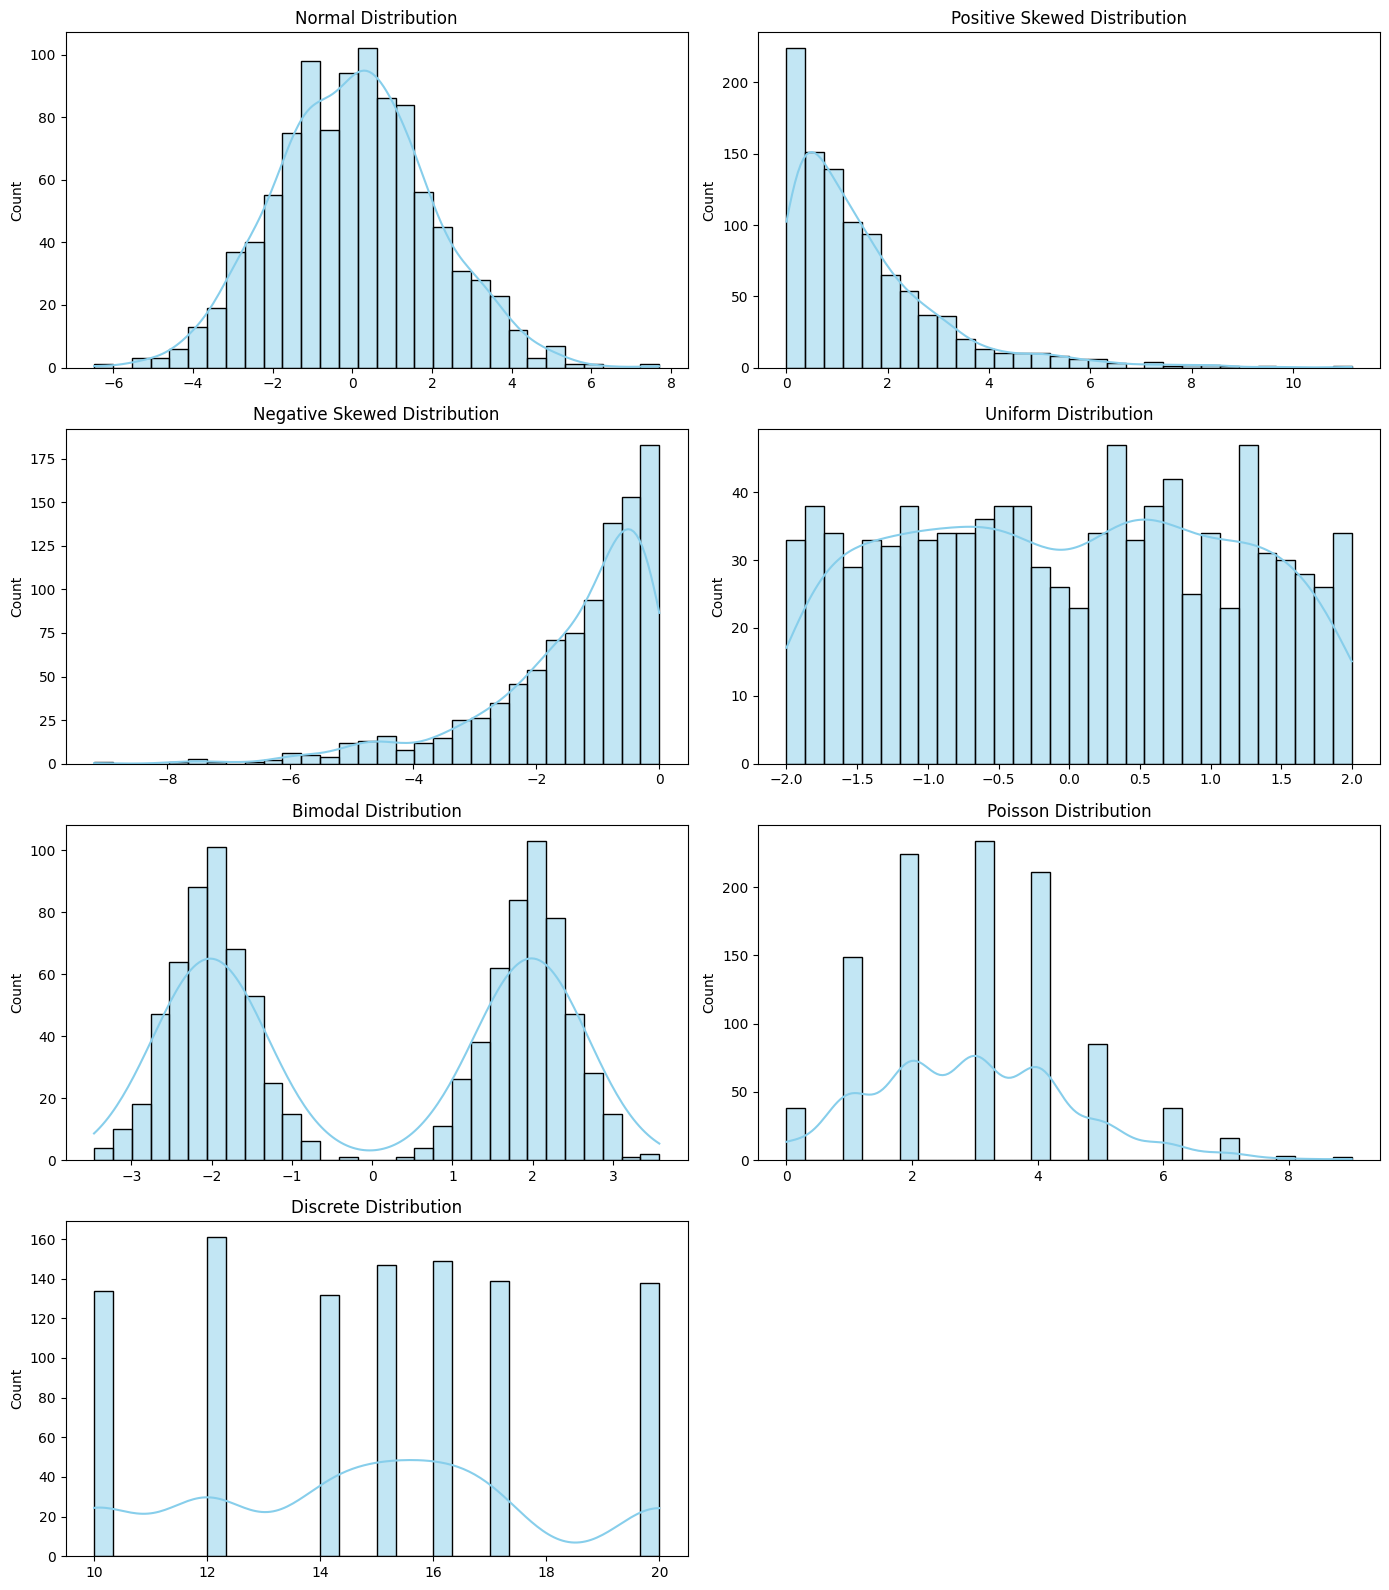

In [8]:
# Plotting the distribution of each column in a grid
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 16))
axes = axes.flatten()

# Plot each distribution with a histogram and KDE
for i, col in enumerate(df.columns):
    sns.histplot(df[col], kde=True, ax=axes[i], bins=30, color='skyblue')
    axes[i].set_title(f"{col} Distribution")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Count")

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()